In [2]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import phoebe
from phoebe import u
%matplotlib inline

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


In [2]:
phoebe.update_all_passbands(local=True, content=None)

## TESS light curve plotting

In [3]:
#search TESS light curves
J0938_coordinates = '144.60908 25.473091'
J0045_coordinates = '0.18784 6.49496'
J0556_coordinates = '1.48694 -1.476551'
J0654_coordinates = '103.50797 75.457218'
target_coordinates = '08:31:18.6 -08:18:56'
lc = lk.search_lightcurve(J0045_coordinates, mission='TESS')#.download()
lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 42,2021,TESS-SPOC,600,418735227,0.0
1,TESS Sector 70,2023,TESS-SPOC,200,418735227,0.0
2,TESS Sector 42,2021,QLP,600,418735227,0.0
3,TESS Sector 70,2023,QLP,200,418735227,0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


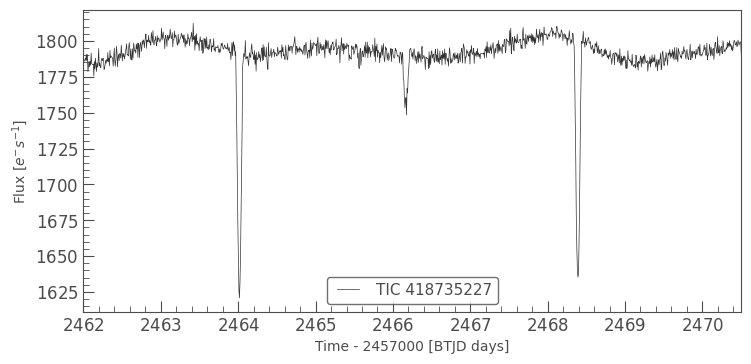

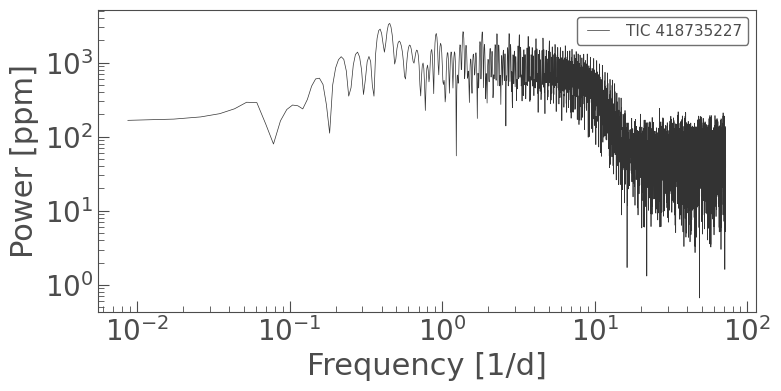

In [10]:
lightcurve = lc.download()
# start_time = 2462
# end_time = 2471
# filtered_lc = lightcurve[(lightcurve.time.value >= start_time) & (lightcurve.time.value <= end_time)]
# filtered_lc.plot()
lightcurve.plot()
# plt.xticks(fontsize = 20)
# plt.yticks(np.arange(740, 920, step=80), fontsize = 20)
# plt.xlabel('Time - 2457000 [BTJD days]', fontsize = 22)
plt.ylabel('Flux [$e^{-} s^{-1}$]', fontsize = 10)
plt.xlim(2462,2470.5)
# plt.ylim(220,270)
pg = lightcurve.normalize(unit='ppm').to_periodogram()
pg.plot(scale='log')
plt.xticks(fontsize = 20)
plt.yticks( fontsize = 20)
plt.ylabel('Power [ppm]', fontsize = 22)
plt.xlabel('Frequency [1/d]', fontsize = 22)
plt.savefig('/Users/mac/Desktop/cassi/light_curves/J065401.91+752725.9/TESS/periodogram.png')

In [5]:
lightcurve

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2447.7027638245213,1.7949303e+03,3.4446518e+00,4.7377986e-03,175714,870.10263,2039.23827,1.4221782e+03,2.5517795e+00,8.7500659e+02,9.3816751e-01,1.7949303e+03,3.4446518e+00,0,———,———,———,———,870.10263,1.1511378e-03,2039.23827,1.0565978e-03,-5.8947824e-02,-1.0299020e-01
2447.709708675976,1.7996543e+03,3.4485886e+00,4.7382088e-03,175715,870.10560,2039.23709,1.4257266e+03,2.5546958e+00,8.7526251e+02,9.3838149e-01,1.7996543e+03,3.4485886e+00,0,———,———,———,———,870.10560,1.1487599e-03,2039.23709,1.0566589e-03,-5.8043808e-02,-1.0152997e-01
2447.7235983779524,1.7927076e+03,3.4457741e+00,4.7390284e-03,175717,870.10586,2039.23847,1.4210333e+03,2.5526109e+00,8.7591718e+02,9.4031382e-01,1.7927076e+03,3.4457741e+00,0,———,———,———,———,870.10586,1.1525928e-03,2039.23847,1.0576717e-03,-5.9264328e-02,-1.0162392e-01
2447.7305432280095,1.7980021e+03,3.4471724e+00,4.7394373e-03,175718,870.10613,2039.24404,1.4247911e+03,2.5536468e+00,8.7430475e+02,9.3762428e-01,1.7980021e+03,3.4471724e+00,0,———,———,———,———,870.10613,1.1513005e-03,2039.24404,1.0559920e-03,-5.7442017e-02,-9.4632991e-02
2447.7374880780676,1.7892738e+03,3.4446640e+00,4.7398461e-03,175719,870.11071,2039.24043,1.4191118e+03,2.5517883e+00,8.7294153e+02,9.3838257e-01,1.7892738e+03,3.4446640e+00,0,———,———,———,———,870.11071,1.1547853e-03,2039.24043,1.0605106e-03,-5.3354513e-02,-9.9277996e-02
2447.7444329281248,1.7945944e+03,3.4430573e+00,4.7402550e-03,175720,870.10714,2039.24402,1.4225248e+03,2.5505984e+00,8.7258716e+02,9.3694365e-01,1.7945944e+03,3.4430573e+00,0,———,———,———,———,870.10714,1.1512197e-03,2039.24402,1.0568235e-03,-5.7863511e-02,-9.3793474e-02
2447.7513777772506,1.7906771e+03,3.4443812e+00,4.7406629e-03,175721,870.10755,2039.24068,1.4201240e+03,2.5515790e+00,8.7293091e+02,9.3744719e-01,1.7906771e+03,3.4443812e+00,0,———,———,———,———,870.10755,1.1532445e-03,2039.24068,1.0602192e-03,-5.3659212e-02,-9.7301438e-02
2447.7583226263773,1.7916974e+03,3.4430091e+00,4.7410708e-03,175722,870.10701,2039.24088,1.4203954e+03,2.5505626e+00,8.7289948e+02,9.3732387e-01,1.7916974e+03,3.4430091e+00,0,———,———,———,———,870.10701,1.1532789e-03,2039.24088,1.0574794e-03,-5.4266527e-02,-9.8175414e-02


In [6]:
pg.show_properties()
period = pg.period_at_max_power

lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      418735227      
          default_view      frequency      
                 label  TIC 418735227      
             ls_method           fast      
frequency_at_max_power         0.4527 1 / d
             max_power      3371.6723   ppm
               nyquist        71.9978 1 / d
   period_at_max_power         2.2089     d
             frequency  array (8270,) 1 / d
                period  array (8270,)     d
                 power  array (8270,)   ppm
                  meta <class 'dict'>      


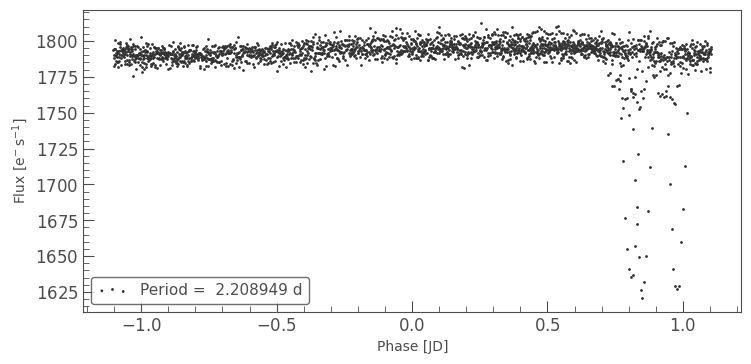

In [7]:
lightcurve.fold(period).scatter(label=fr'Period = {period: 5f}');
# plt.xticks(np.arange(-1, 1, step=0.3), fontsize = 20)
# plt.yticks(np.arange(4406, 4428, step=5), fontsize = 20)
# plt.xlabel('Phase', fontsize = 30)
# plt.ylabel('Flux [$e^{-} s^{-1}$]', fontsize = 30)

## ASAS-SN plotting

/var/folders/69/qyn6t8gs2d72s601sh3t50sc0000gn/T/ipykernel_27765/3778811596.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


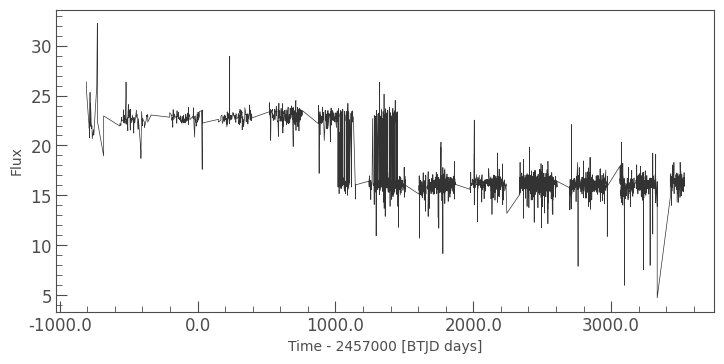

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

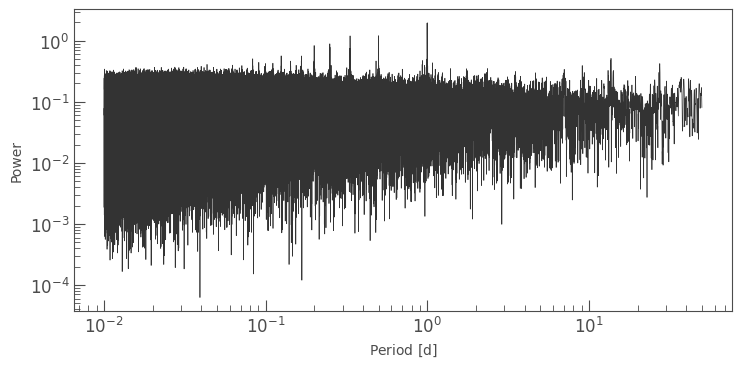

In [8]:
df = pd.read_csv('/Users/mac/Desktop/cassi/light_curves/J000045.08+062941.8/ASAS-SN/ASAS-SN_lc.csv')
df_V = df[(df['flux(mJy)'] != 99.990)]
lc = lk.LightCurve(time=df_V['HJD'], flux=df_V['flux(mJy)'], flux_err=df_V['flux_err'])
# start_time = -1000 + 2457000
# end_time = 1000 + 2457000
# filtered_lc = lc[(lc.time.value >= start_time) & (lc.time.value <= end_time)]
# filtered_lc.plot()
lc.plot()
current_labels = plt.gca().get_xticks()
new_labels = current_labels - 2457000
plt.gca().set_xticklabels(new_labels)
plt.xlabel('Time - 2457000 [BTJD days]')
plt.ylabel('Flux')
plt.show()
pg = lc.to_periodogram(minimum_period = 0.01, maximum_period = 50)
pg.plot(view='period', scale='log')

In [9]:
pg.show_properties()
period = pg.period_at_max_power
period = 4.18

lightkurve.Periodogram properties:
      Attribute                   Description            Units
---------------------- --------------------------------- -----
                nterms                                 1      
          default_view                            period      
             ls_method                              fast      
frequency_at_max_power                            0.9999 1 / d
             max_power                            1.9633      
               nyquist                          387.5969 1 / d
   period_at_max_power                            1.0001     d
             frequency                  array (2168096,) 1 / d
                period                  array (2168096,)     d
                 power                  array (2168096,)      
                 label                <class 'NoneType'>      
                  meta <class 'collections.OrderedDict'>      
              targetid                <class 'NoneType'>      


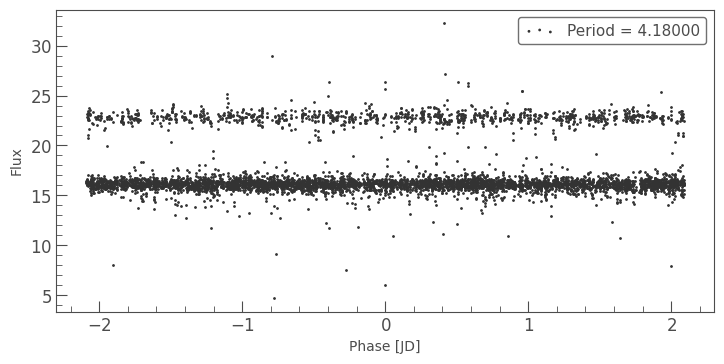

In [10]:
folded_lc = lc.fold(period).scatter(label=fr'Period = {period:.5f}')
# flux_mask = (folded_lc.flux.value > 5) & (folded_lc.flux.value <8)
# filtered_folded_lc = folded_lc[flux_mask]
# plt.figure(figsize=(10, 5))
# plt.plot(filtered_folded_lc.time.value, filtered_folded_lc.flux.value, 'k.', markersize=1)
# plt.xlabel('Phase')
# plt.ylabel('Flux')
# plt.title(f'Folded Light Curve (Period = {period * 4})')